# Checking results in summary.json files generated by nnUNet

In [1]:
# imports
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to predicted data
data_path = '../../../nnUNet_data/nnUNet_raw/Dataset361_Menisci/'

# list subfolders at this path
subfolders = [f.name for f in os.scandir(data_path) if f.is_dir()]
subfolders

['ResEnc_3d_bs4_predsTs',
 'imagesTs_skmtea',
 'clahe_predsTs',
 'clip_rescale_predsTs',
 'zscore_predsTs_skmtea',
 'clahe_hist_match_predsTs_skmtea',
 'labelsTs',
 'ResEnc_3d_bs4_predsTs_skmtea',
 'zscore_hist_match_predsTs_skmtea',
 'zscore_predsTs',
 'labelsTr',
 'hist_eq_predsTs',
 'hist_eq_predsTs_skmtea',
 'clip_rescale_predsTs_skmtea',
 'imagesTr',
 'ResEnc_32G_3d_predsTs',
 'clahe_predsTs_skmtea',
 'ResEnc_32G_3d_predsTs_skmtea',
 'labelsTs_skmtea',
 'imagesTs']

In [3]:
# function to take json file and return array of dice scores
def get_dice_scores(json_file):
    with open(json_file) as f:
        data = json.load(f)

    # Extract Dice scores from "metric_per_case"
    dice_scores = [
        case["metrics"]["1"]["Dice"] for case in data["metric_per_case"]
    ]

    return dice_scores

In [4]:
# Get dice scores from zscore_predsTs folder
json_path = os.path.join(data_path, 'zscore_predsTs', 'summary.json')
zscore_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Zscore Results")
print(f"Mean Dice score: {np.mean(zscore_dice_scores):.4f}")
print(f"Std Dice score: {np.std(zscore_dice_scores):.4f}")

Zscore Results
Mean Dice score: 0.8923
Std Dice score: 0.0271


In [38]:
# what other metrics are there?
with open(json_path) as f:
    data = json.load(f)

# extract all metrics
data["metric_per_case"][1]

{'metrics': {'1': {'Dice': 0.8217493801568915,
   'FN': 11918,
   'FP': 5624,
   'IoU': 0.6974317401728272,
   'TN': 14454983,
   'TP': 40435,
   'n_pred': 46059,
   'n_ref': 52353}},
 'prediction_file': 'clahe_hist_match_predsTs_skmtea/SKMTEA_002.nii.gz',
 'reference_file': 'labelsTs_skmtea/SKMTEA_002.nii.gz'}

In [5]:
# Get dice scores from clip_rescale_predsTs folder
json_path = os.path.join(data_path, 'clip_rescale_predsTs', 'summary.json')
clip_rescale_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clip Rescale Results")
print(f"Mean Dice score: {np.mean(clip_rescale_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clip_rescale_dice_scores):.4f}")

Clip Rescale Results
Mean Dice score: 0.8909
Std Dice score: 0.0273


In [6]:
# Get dice scores from hist_eq_predsTs folder
json_path = os.path.join(data_path, 'hist_eq_predsTs', 'summary.json')
hist_eq_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Hist Eq Results")
print(f"Mean Dice score: {np.mean(hist_eq_dice_scores):.4f}")
print(f"Std Dice score: {np.std(hist_eq_dice_scores):.4f}")

Hist Eq Results
Mean Dice score: 0.8888
Std Dice score: 0.0286


In [7]:
# get dice scores from clahe_predsTs folder
json_path = os.path.join(data_path, 'clahe_predsTs', 'summary.json')
clahe_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clahe Results")
print(f"Mean Dice score: {np.mean(clahe_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clahe_dice_scores):.4f}")

Clahe Results
Mean Dice score: 0.8906
Std Dice score: 0.0297


In [8]:
# Get dice scores from ResEnc_3d_bs4_predsTs folder
json_path = os.path.join(data_path, 'ResEnc_3d_bs4_predsTs', 'summary.json')
resenc_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("ResEnc Results")
print(f"Mean Dice score: {np.mean(resenc_dice_scores):.4f}")
print(f"Std Dice score: {np.std(resenc_dice_scores):.4f}")

ResEnc Results
Mean Dice score: 0.8929
Std Dice score: 0.0267


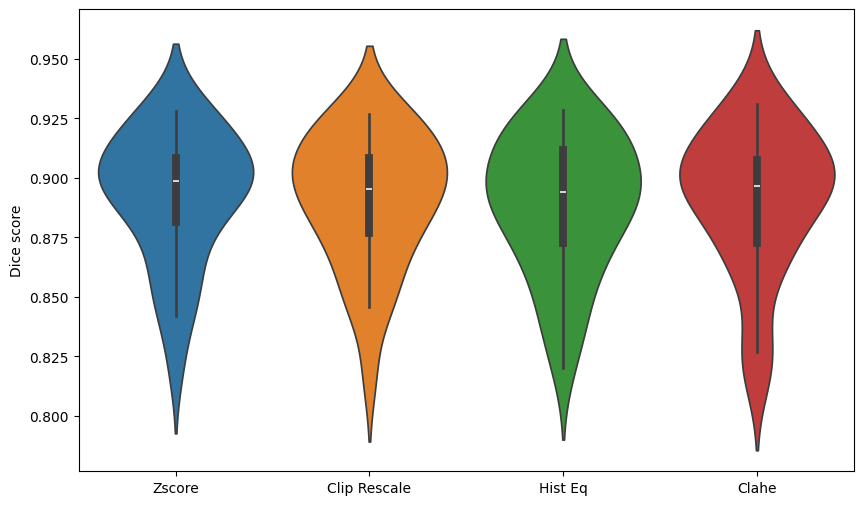

In [10]:
# plot a violin plot of the three sets of dice scores
df = pd.DataFrame({
    "Zscore": zscore_dice_scores,
    "Clip Rescale": clip_rescale_dice_scores,
    "Hist Eq": hist_eq_dice_scores,
    "Clahe": clahe_dice_scores
    #"ResEnc": resenc_dice_scores
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.ylabel("Dice score")
plt.show()

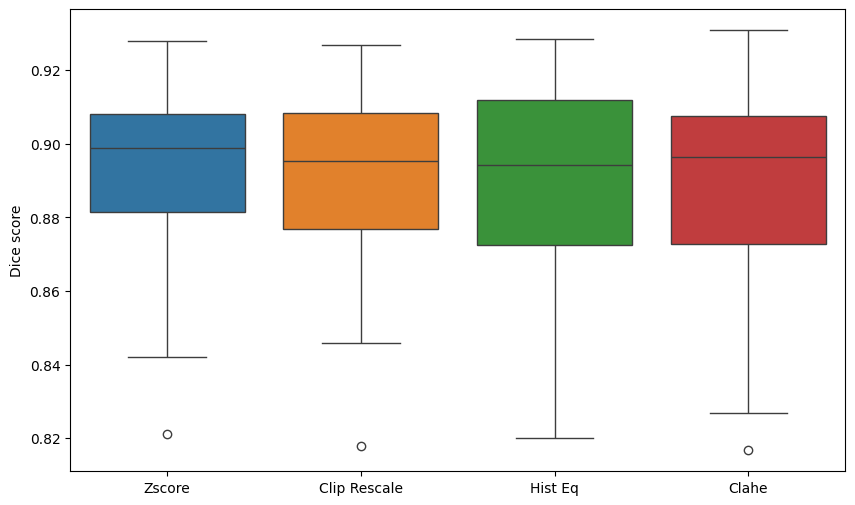

In [52]:
# plot box plot of dice scores, also show mean
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.ylabel("Dice score")
plt.savefig('boxplot_internal_dice_scores.png')
plt.show()

## External Validation Results

In [13]:
# Get dice scores from zscore_predsTs_skmtea folder
json_path = os.path.join(data_path, 'zscore_predsTs_skmtea', 'summary.json')
zscore_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Zscore Results - External")
print(f"Mean Dice score: {np.mean(zscore_dice_scores):.4f}")
print(f"Std Dice score: {np.std(zscore_dice_scores):.4f}")

Zscore Results - External
Mean Dice score: 0.7976
Std Dice score: 0.0466


In [14]:
# Get dice scores from clip_rescale_predsTs_skmtea folder
json_path = os.path.join(data_path, 'clip_rescale_predsTs_skmtea', 'summary.json')
clip_rescale_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clip Rescale Results - External")
print(f"Mean Dice score: {np.mean(clip_rescale_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clip_rescale_dice_scores):.4f}")

Clip Rescale Results - External
Mean Dice score: 0.7925
Std Dice score: 0.0468


In [15]:
# Get dice scores from hist_eq_predsTs_skmtea folder
json_path = os.path.join(data_path, 'hist_eq_predsTs_skmtea', 'summary.json')
hist_eq_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Hist Eq Results - External")
print(f"Mean Dice score: {np.mean(hist_eq_dice_scores):.4f}")
print(f"Std Dice score: {np.std(hist_eq_dice_scores):.4f}")

Hist Eq Results - External
Mean Dice score: 0.7920
Std Dice score: 0.0448


In [16]:
# Get dice scores from clahe_predsTs_skmtea folder
json_path = os.path.join(data_path, 'clahe_predsTs_skmtea', 'summary.json')
clahe_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clahe Results - External")
print(f"Mean Dice score: {np.mean(clahe_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clahe_dice_scores):.4f}")

Clahe Results - External
Mean Dice score: 0.7984
Std Dice score: 0.0433


In [17]:
# Get dice scores from ResEnc_3d_bs4_predsTs_skmtea folder
json_path = os.path.join(data_path, 'ResEnc_3d_bs4_predsTs_skmtea', 'summary.json')
resenc_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("ResEnc Results - External")
print(f"Mean Dice score: {np.mean(resenc_dice_scores):.4f}")
print(f"Std Dice score: {np.std(resenc_dice_scores):.4f}")

ResEnc Results - External
Mean Dice score: 0.7927
Std Dice score: 0.0448


In [18]:
# get dice scores from zscore_hist_match_predsTs folder
json_path = os.path.join(data_path, 'zscore_hist_match_predsTs_skmtea', 'summary.json')
zscore_hist_match_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Zscore Hist Match Results")
print(f"Mean Dice score: {np.mean(zscore_hist_match_dice_scores):.4f}")
print(f"Std Dice score: {np.std(zscore_hist_match_dice_scores):.4f}")

Zscore Hist Match Results
Mean Dice score: 0.7995
Std Dice score: 0.0463


In [24]:
# get dice scores from clahe_hist_match_predsTs folder
json_path = os.path.join(data_path, 'clahe_hist_match_predsTs_skmtea', 'summary.json')
clahe_hist_match_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clahe Hist Match Results")
print(f"Mean Dice score: {np.mean(clahe_hist_match_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clahe_hist_match_dice_scores):.4f}")

Clahe Hist Match Results
Mean Dice score: 0.7973
Std Dice score: 0.0438


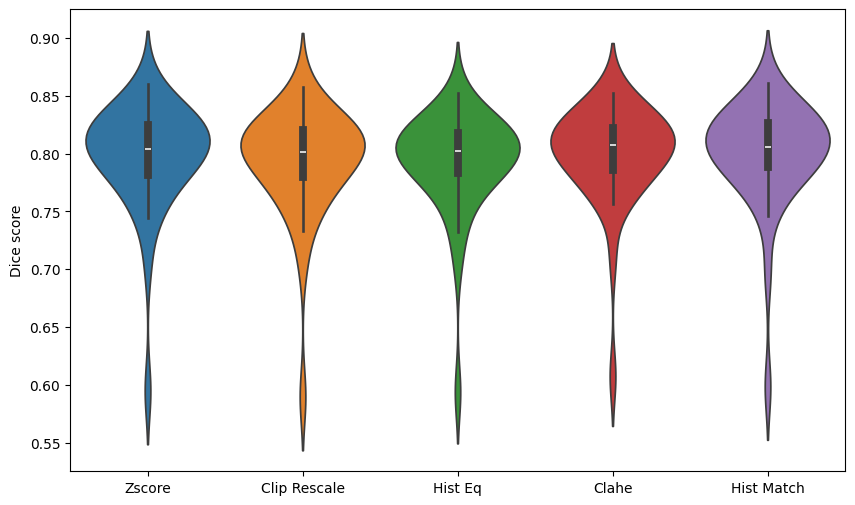

In [27]:
# plot a violin plot of the external dice scores
external_df = pd.DataFrame({
    "Zscore": zscore_dice_scores,
    "Clip Rescale": clip_rescale_dice_scores,
    "Hist Eq": hist_eq_dice_scores,
    "Clahe": clahe_dice_scores,
    "Hist Match": zscore_hist_match_dice_scores
    #"ResEnc": resenc_dice_scores
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=external_df)
plt.ylabel("Dice score")
plt.show()

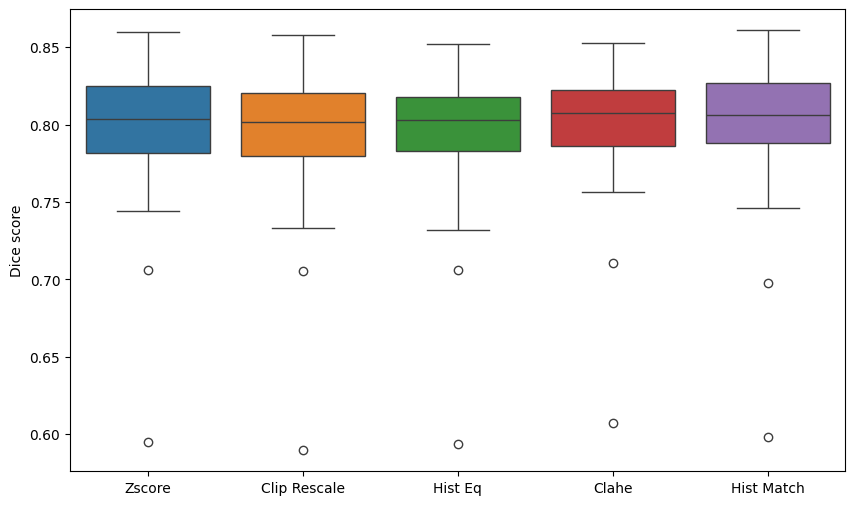

In [28]:
# plot box plot of dice scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=external_df)
plt.ylabel("Dice score")
plt.savefig('boxplot_external_dice_scores.png')
plt.show()

In [29]:
# remove outlier

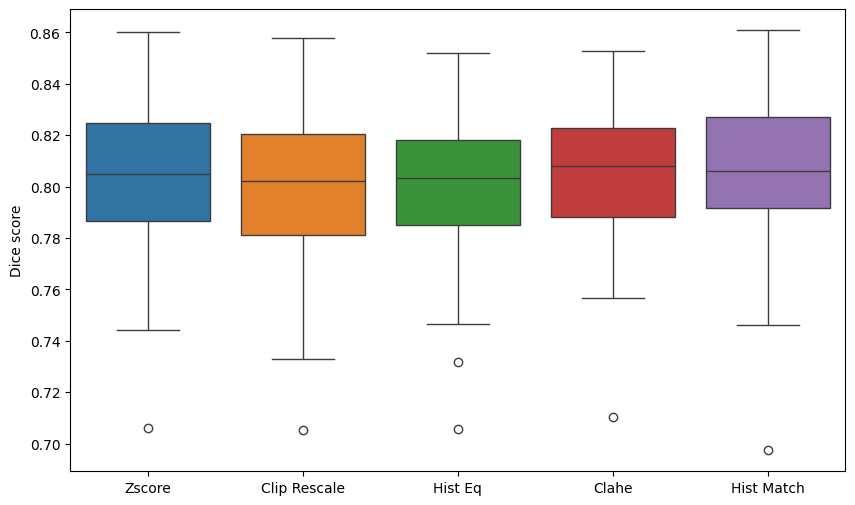

In [53]:
# plot box plot of dice scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=external_df[external_df["Zscore"] > 0.7])
plt.ylabel("Dice score")
plt.savefig('boxplot_external_dice_scores_no_outliers.png')
plt.show()

In [54]:
external_df.describe()

,Zscore,Clip Rescale,Hist Eq,Clahe,Hist Match
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.797566,0.792510,0.791993,0.798401,0.799541
std,0.047239,0.047445,0.045410,0.043959,0.046939
min,0.594690,0.589659,0.593653,0.607291,0.598201
25%,0.781571,0.779523,0.783146,0.786128,0.788067
50%,0.803570,0.801367,0.802630,0.807578,0.805868
75%,0.824698,0.820225,0.817648,0.822481,0.826841
max,0.860019,0.857963,0.852190,0.852678,0.860842


In [31]:
# Are any of the differences statistically significant?
from scipy.stats import ttest_rel

# perform t-test between all pairs of methods
methods = external_df.columns
for i, method1 in enumerate(methods):
    for method2 in methods[i + 1:]:
        t_stat, p_val = ttest_rel(external_df[method1], external_df[method2])
        print(f"{method1} vs {method2}: p-value = {p_val:.4f}")

Zscore vs Clip Rescale: p-value = 0.0096
Zscore vs Hist Eq: p-value = 0.0027
Zscore vs Clahe: p-value = 0.4770
Zscore vs Hist Match: p-value = 0.1678
Clip Rescale vs Hist Eq: p-value = 0.8571
Clip Rescale vs Clahe: p-value = 0.0085
Clip Rescale vs Hist Match: p-value = 0.0189
Hist Eq vs Clahe: p-value = 0.0001
Hist Eq vs Hist Match: p-value = 0.0000
Clahe vs Hist Match: p-value = 0.4646


In [33]:
from scipy.stats import wilcoxon

# perform wilcoxon signed-rank test between all pairs of methods
for i, method1 in enumerate(methods):
    for method2 in methods[i + 1:]:
        t_stat, p_val = wilcoxon(external_df[method1], external_df[method2])
        print(f"{method1} vs {method2}: p-value = {p_val:.4f}")

Zscore vs Clip Rescale: p-value = 0.0001
Zscore vs Hist Eq: p-value = 0.0000
Zscore vs Clahe: p-value = 0.6922
Clip Rescale vs Hist Eq: p-value = 0.0078
Clip Rescale vs Clahe: p-value = 0.0014
Hist Eq vs Clahe: p-value = 0.0000


In [32]:
# What about for the internal data?
# perform t-test between all pairs of methods
methods = df.columns
for i, method1 in enumerate(methods):
    for method2 in methods[i + 1:]:
        t_stat, p_val = ttest_rel(df[method1], df[method2])
        print(f"{method1} vs {method2}: p-value = {p_val:.4f}")

Zscore vs Clip Rescale: p-value = 0.0371
Zscore vs Hist Eq: p-value = 0.0100
Zscore vs Clahe: p-value = 0.1143
Clip Rescale vs Hist Eq: p-value = 0.0400
Clip Rescale vs Clahe: p-value = 0.8118
Hist Eq vs Clahe: p-value = 0.2998


In [34]:
#wilcoxon test for internal data
for i, method1 in enumerate(methods):
    for method2 in methods[i + 1:]:
        t_stat, p_val = wilcoxon(df[method1], df[method2])
        print(f"{method1} vs {method2}: p-value = {p_val:.4f}")

Zscore vs Clip Rescale: p-value = 0.0298
Zscore vs Hist Eq: p-value = 0.0029
Zscore vs Clahe: p-value = 0.2946
Clip Rescale vs Hist Eq: p-value = 0.0179
Clip Rescale vs Clahe: p-value = 0.4652
Hist Eq vs Clahe: p-value = 0.1200


## Check outlier cases

In [55]:
external_df.head()

,Zscore,Clip Rescale,Hist Eq,Clahe,Hist Match
0,0.805965,0.805431,0.798320,0.808927,0.804438
1,0.824203,0.820140,0.819322,0.817151,0.827034
2,0.594690,0.589659,0.593653,0.607291,0.598201
3,0.827142,0.816852,0.812666,0.823936,0.827069
4,0.751779,0.745950,0.731941,0.761943,0.745986


(160, 266, 341)


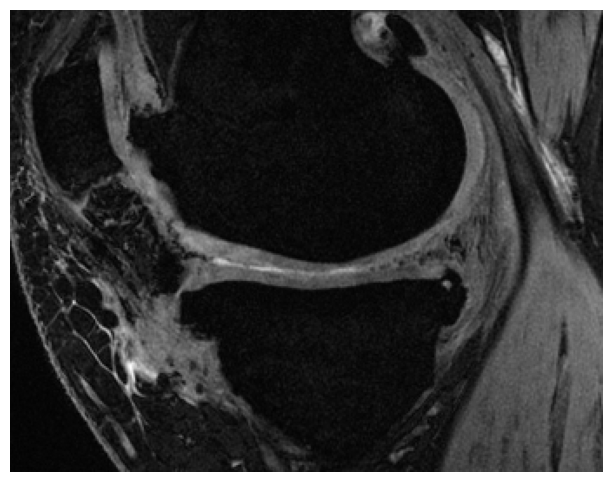

In [56]:
# external image 3 has a very low dice score for all methods
# let's look at this image
# skmtea paths
im_num = 2 # indexing starts at 0
skmtea_im_path = os.path.join(data_path, 'imagesTs_skmtea')
image_paths = [f.path for f in os.scandir(skmtea_im_path) if f.is_file()]
image_paths.sort()
bad_image_path = image_paths[im_num]

# load image (.nii.gz)
import SimpleITK as sitk

image = sitk.ReadImage(bad_image_path)
image_array = sitk.GetArrayFromImage(image)
print(image_array.shape)

# plot image
plt.figure(figsize=(10, 6))
plt.imshow(image_array[100,...], cmap="gray")
plt.axis("off")
plt.show()

In [57]:
# load mask
skmtea_mask_path = os.path.join(data_path, 'labelsTs_skmtea')
mask_paths = [f.path for f in os.scandir(skmtea_mask_path) if f.is_file()]
mask_paths.sort()
mask_path = mask_paths[im_num]
mask = sitk.ReadImage(mask_path)
mask_array = sitk.GetArrayFromImage(mask)
print(mask_array.shape)

(160, 266, 341)


In [58]:
# load prediction
zscore_preds_path = os.path.join(data_path, 'zscore_predsTs_skmtea')
pred_paths = [f.path for f in os.scandir(zscore_preds_path) if f.is_file()]
pred_paths.sort()
pred_path = pred_paths[im_num]
pred = sitk.ReadImage(pred_path)
pred_array = sitk.GetArrayFromImage(pred)
print(pred_array.shape)

(160, 266, 341)


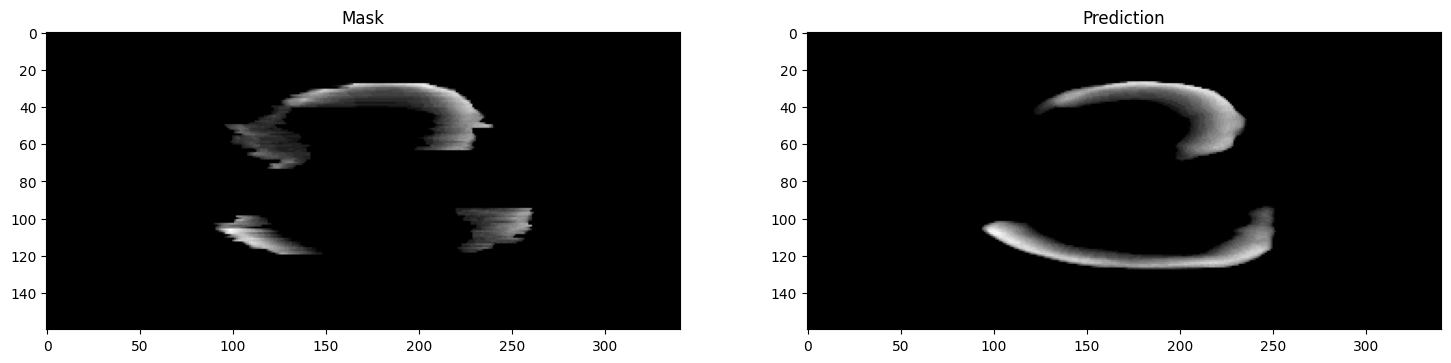

In [66]:
# plot both mask and prediction, summing through axis 1
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.imshow(np.sum(mask_array, axis=1), cmap="gray")
plt.title("Mask")
plt.subplot(1, 2, 2)
plt.imshow(np.sum(pred_array, axis=1), cmap="gray")
plt.title("Prediction")
plt.show()

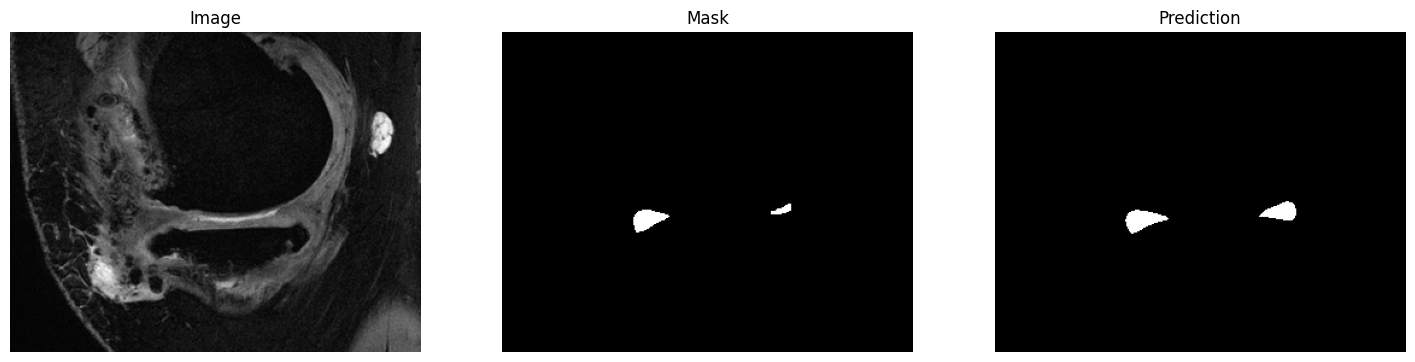

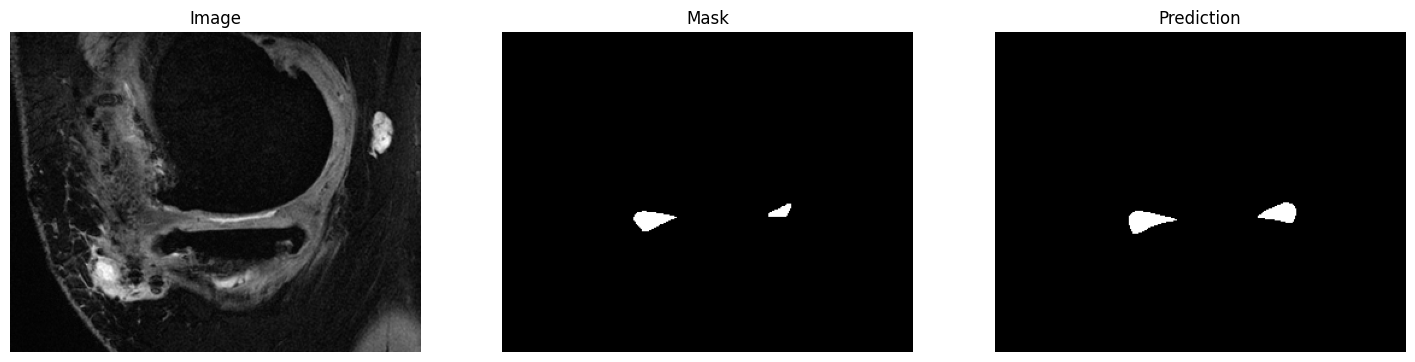

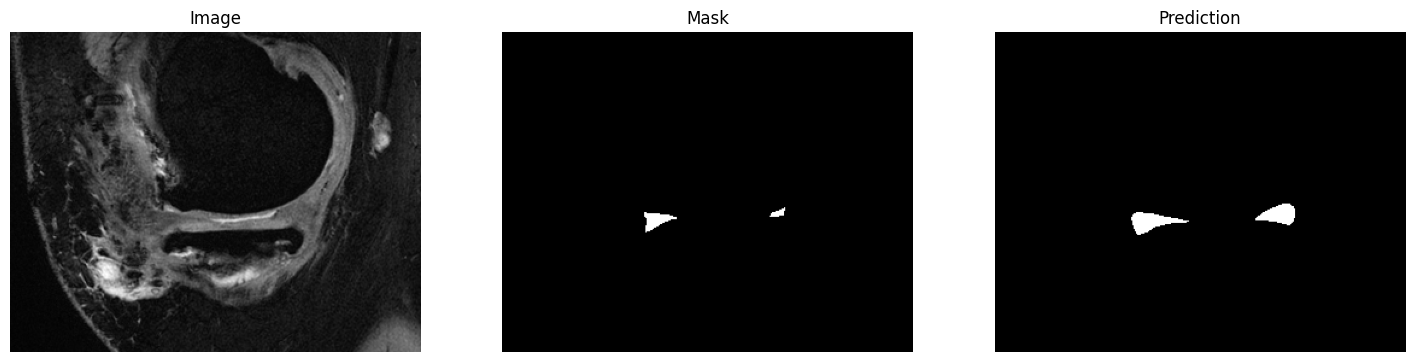

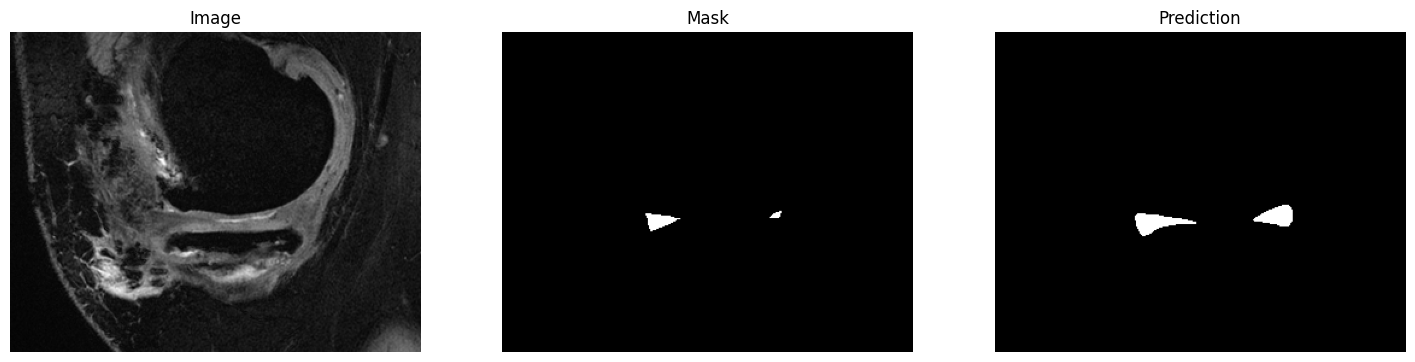

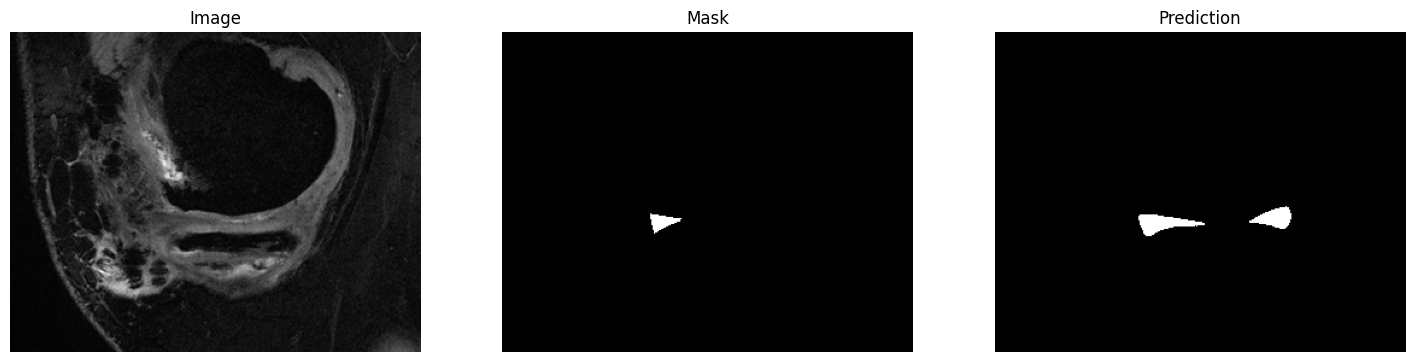

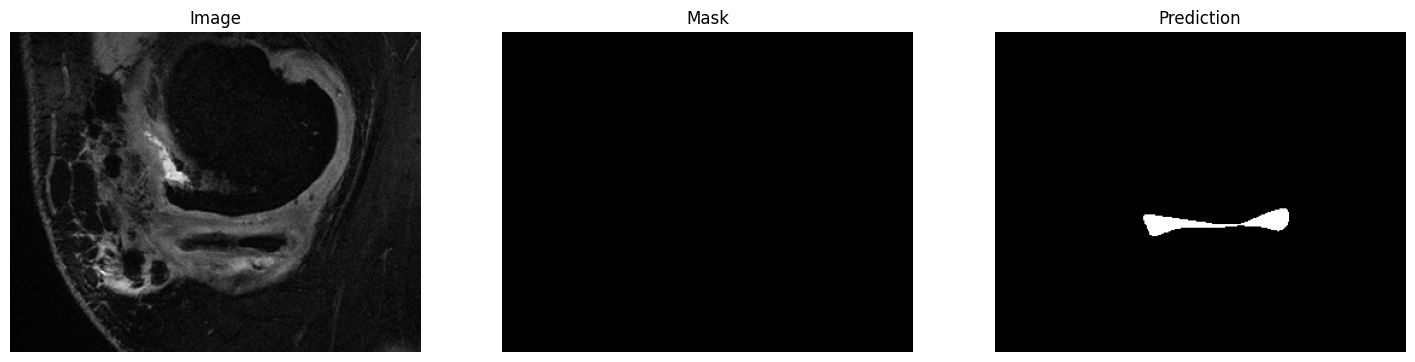

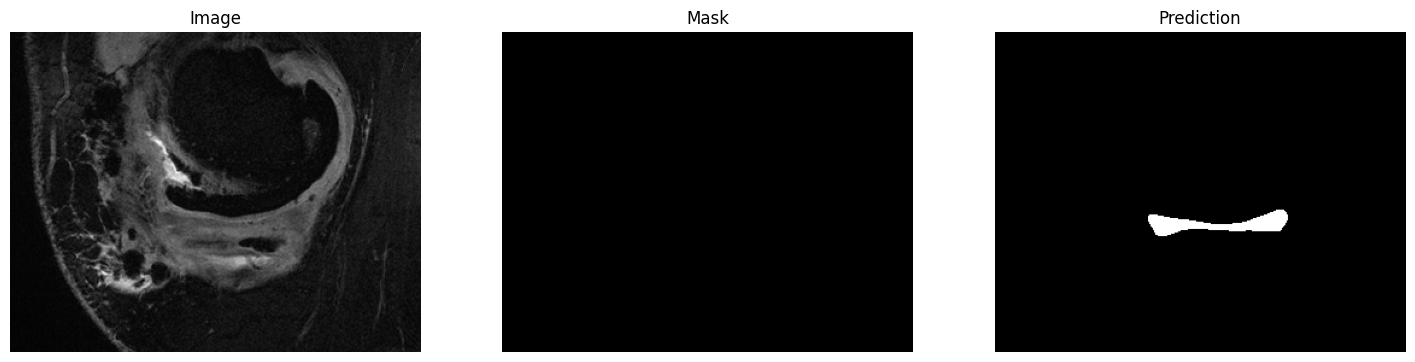

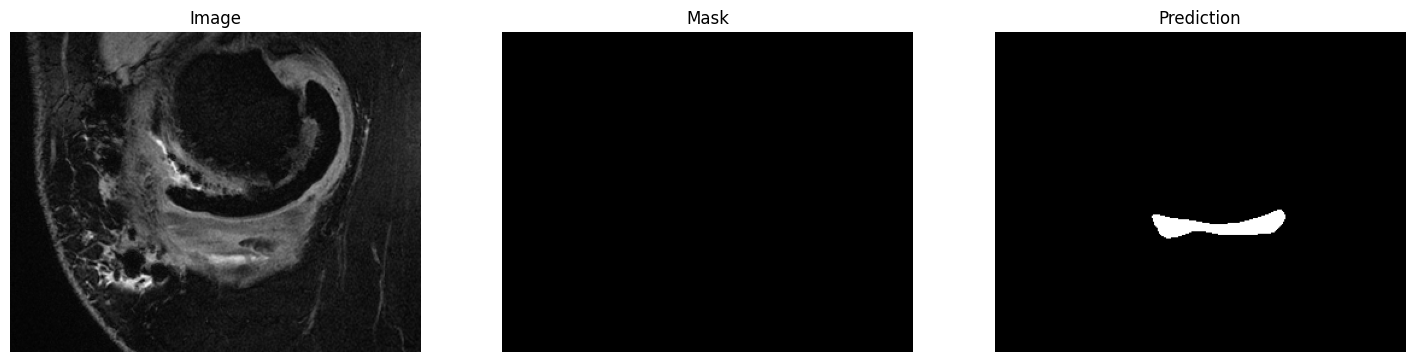

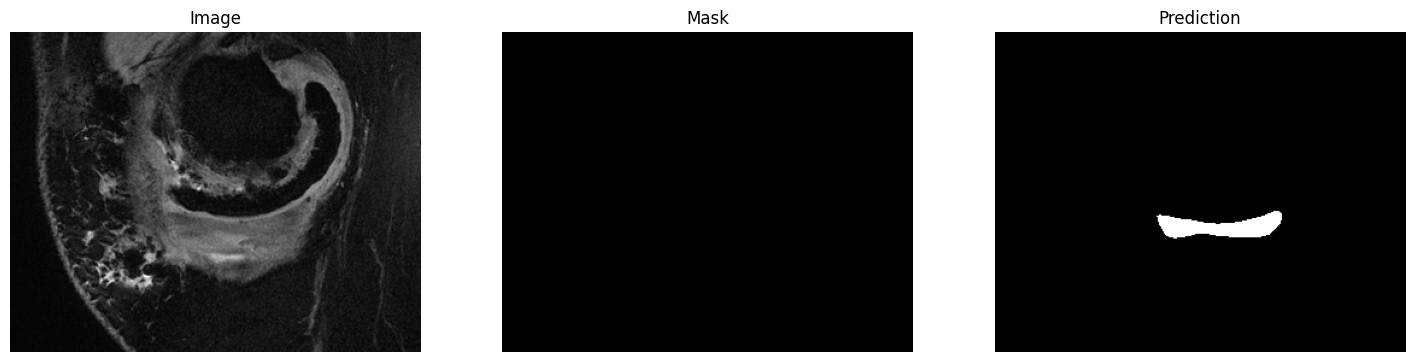

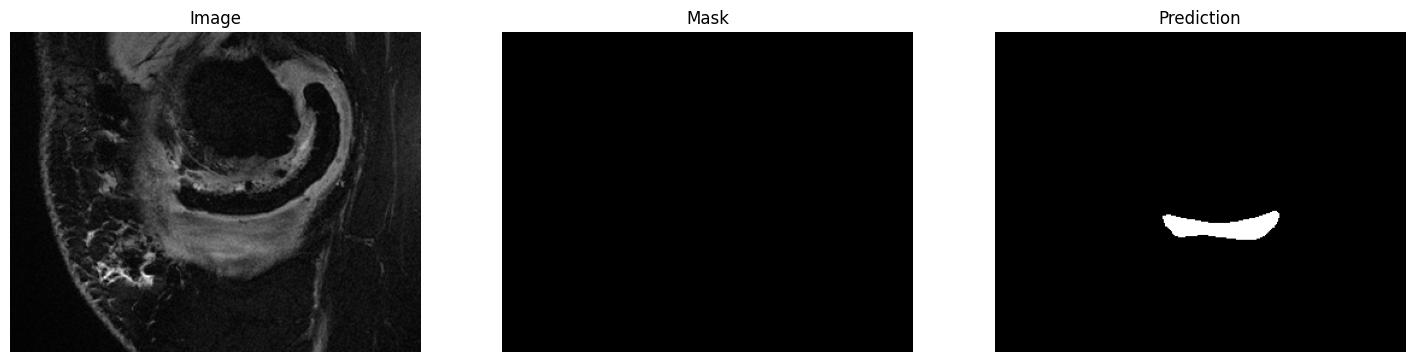

In [70]:
# look at slice 115-125, slice by slice (image on left and mask on right)
for i in range(115, 125):
    plt.figure(figsize=(18, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(image_array[i,...], cmap="gray")
    plt.title("Image")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(mask_array[i,...], cmap="gray")
    plt.title("Mask")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(pred_array[i,...], cmap="gray")
    plt.title("Prediction")
    plt.axis("off")
    plt.show()

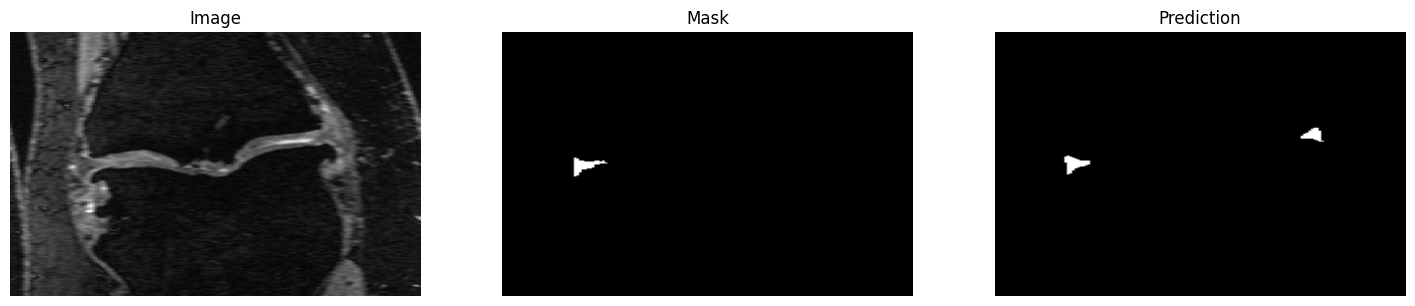

In [76]:
# look at slice 170 in the z direction on image mask and prediction, rotated 90 degrees
plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.rot90(image_array[...,170]), cmap="gray", aspect = (0.31/0.8))
plt.title("Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(np.rot90(mask_array[...,170]), cmap="gray", aspect = (0.31/0.8))
plt.title("Mask")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(np.rot90(pred_array[...,170]), cmap="gray", aspect = (0.31/0.8))
plt.title("Prediction")
plt.axis("off")
plt.show()